<a href="https://colab.research.google.com/github/01-vyom/Emotion-Classification-in-Hindi/blob/master/Emotion_Classification_in_Hindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Manipulations

## Import

In [1]:
%tensorflow_version 2.x
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import codecs
import pandas as pd 
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import re
from itertools import islice
from sklearn.utils import shuffle
!pip install cltk
from cltk.stop.classical_hindi.stops import STOPS_LIST

TensorFlow 2.x selected.


## Importing Sentences
Sentences are being imported from the google drive and than divided  according to emotions and clubbed into a single dictionary where key is the sentence and the value is the emotion.
Also a single string is created from all the sentences to be used afterwards for generating tokens.

In [0]:
#emotions dictionary to iterate over each file in particular emotion
emotions = {"angry":130,
"happy":151,
"neutral":128,
"sad":104}
#dataset to store the whole senteces as {sentence:emotion}.
dataset = dict()
#wholedata to store all the sentences as one string.
wholedata = u""
filepath = "/content/drive/My Drive/emotions"
#iterate over each emotion directory to import all the sentences.
for emo in emotions:
  nosents = emotions[emo]
  fp = filepath+"/"+emo
  for i in range(nosents):
    fp1 = fp+"/"+str(i)+".txt"
    f=codecs.open(fp1,encoding='utf-8')
    tp = f.read()
    #removing extra character from sentences.
    tp = tp.replace("!", "").replace("-", " ").replace(";", " ").replace("।", " ").replace(".", " ")
    wholedata = wholedata+tp
    dataset[tp]=emo
  fp1 = fp+"/"+emo+".txt"
  f=codecs.open(fp1,encoding='utf-8')
  tp = f.read()
  temp = tp.split("\n")
  for i in temp:
    i = i.replace("!", "").replace("-", " ").replace(";", " ").replace("।", " ").replace(".", " ")
    wholedata += i
    dataset[i] = emo       

## Forming Dataset
Convert the sentences into dataframe.
Describing the dataset value using pandas.
Shuffling the dataset.

In [0]:
#converting the dictionary of senteces into dataset
Dataset = pd.DataFrame(dataset.items(), columns=['Data', 'Emotions'])

In [4]:
Dataset.head()

,Data,Emotions
0,मेरे ट्रैन का बुकिंग फेल हो रहा है बार बार,angry
1,मेरे फ्लाइट का बुकिंग फेल हो रहा है बार बार,angry
2,बहुत ही घटिया एप्प है तुम्हारा,angry
3,मेरी कैब क्यों नहीं आ रही है,angry
4,बहुत ही बकवास वेबसाइट है तुम्हारा भाई,angry


In [5]:
Dataset.shape

(712, 2)

In [6]:
Dataset.describe()

,Data,Emotions
count,712,712
unique,712,4
top,मगर वो बहुत दुख भरा था \r,neutral
freq,1,198


In [7]:
Dataset

,Data,Emotions
0,मेरे ट्रैन का बुकिंग फेल हो रहा है बार बार,angry
1,मेरे फ्लाइट का बुकिंग फेल हो रहा है बार बार,angry
2,बहुत ही घटिया एप्प है तुम्हारा,angry
3,मेरी कैब क्यों नहीं आ रही है,angry
4,बहुत ही बकवास वेबसाइट है तुम्हारा भाई,angry
...,...,...
707,1864 में बदरूद्दीन एक वर्ष के लिए भारत आये हाल...,sad
708,आरोग्य की एक कविता इसी अनाम कुत्ते पर लिखी...,sad
709,एक दुखी और परेशान राष्ट्रीय कोच टेलीविजन कैमरो...,sad
710,यह दुख की बात है कि हम विरासत में अपने बच्चों ...,sad


In [0]:
mymap = {'angry':0, 'sad':1, 'happy':2, 'neutral':3}
#converting string emotions into integers.
Dataset = Dataset.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [0]:
#Shuffling the dataset.
Dataset = shuffle(Dataset)

In [10]:
Dataset.head()

,Data,Emotions
403,बड़ी गाड़ी बुक कर सकते हो क्या,3
264,कितना सही अप्प है यार,2
75,एकदम बेकार,0
7,क्या बेकार अप्प है,0
686,तो क्या तैंतालीस बार सूर्यास्त देखने वाले दि...,1


In [11]:
Dataset.describe()

,Emotions
count,712.000000
mean,1.588483
std,1.131586
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


## Token Creation
Create tokens from all the sentences.
Displaying frequency for all the tokens.
Displaying frequency for all the tokens which are not part of the STOPWORDLIST of CNLTK library.
 

In [0]:
sentences = wholedata.split(u" ")

In [0]:
#List of tokens
tokens=[]
for each in sentences:
  word_list=each.split(' ')
  tokens=tokens+word_list
tokens = list(map(str.strip, tokens))
tokens = list(filter(None, tokens))

In [0]:
#Frequency List
freq=dict()
for each in tokens:
			freq[each]=tokens.count(each)  

In [15]:
#Displaying 10 most frequency tokens with their frequency.
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
freq={k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
freq10 = take(10, freq.items())
print(freq10)

[('है', 200), ('हो', 92), ('नहीं', 86), ('से', 81), ('क्या', 77), ('की', 77), ('में', 75), ('और', 73), ('के', 70), ('बहुत', 65)]


In [16]:
print(len(tokens))

5343


In [0]:
#Removing tokens which are part of STOPLIST
remtokens = []
for i in tokens:
  if i not in STOPS_LIST:
    remtokens.append(i)

In [18]:
print(len(remtokens))

3522


In [0]:
#Token frequency list without stopwords
remfreq=dict()
for each in remtokens:
			remfreq[each]=remtokens.count(each)

In [20]:
#Displaying 10 most frequency tokens without stopwords with their frequency.
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
remfreq={k: v for k, v in sorted(remfreq.items(), key=lambda item: item[1],reverse=True)}
freq10 = take(10, remfreq.items())
print(freq10)

[('बहुत', 65), ('कर', 57), ('यार', 43), ('गया', 31), ('मैं', 31), ('बात', 31), ('होटल', 30), ('खुश', 29), ('मुझे', 28), ('अच्छा', 28)]


## One Hot Encoding of Dataset
Splitting the dataset into training and testing dataset.
80 % training data.
20 % test data.
Converting datasets into one hot encoding of their respective tokens without stopwords.


In [0]:
#creating unique tokens to convert the sentences dataset into one hot encoding of tokens.
newtokens = list(set(remtokens))

In [22]:
print(len(newtokens))

1464


In [0]:
traindf, testdf = train_test_split(Dataset, test_size=0.2)

In [0]:
#datatokens fuction to convert the sentences into one hot encoding.
def datatokens(Dset):
  sents = Dset['Data'].tolist()
  inds = list(Dset.index.values)
  totalist = []
  maxcnt = 0
  remdataind = []
  for l in range(len(sents)):
    word_list=sents[l].split(' ')
    tplist = []
    cnt = 0
    for to in range(len(newtokens)):
      if newtokens[to] in word_list:
        onehot = [0]*(len(newtokens))
        onehot[to] = 1
        tplist.append(onehot)
        cnt+=1
    if len(tplist)!=0:
      #for each sentence create data of equal size by appending dummy one hot vectors.
      #max size is 20
      while cnt<20:
        onehot = [0]*(len(newtokens))
        tplist.append(onehot)
        cnt+=1
      # temp = np.array(tplist)
      # print(temp.shape)
      totalist.append(tplist)
    else:
      remdataind.append(inds[l])
  #dropping those data which do not contain any tokens without stopwordlist    
  for ind in remdataind:
    Dset = Dset.drop(ind)
  Y_ = Dset[['Emotions']]
  encoder = OneHotEncoder(sparse = False)
  YOneHot = encoder.fit_transform(Y_)    
  return totalist,YOneHot    

In [0]:
traindata,trainlabel = datatokens(traindf)
testdata,testlabel = datatokens(testdf)

In [0]:
#converting all the lists into tensors to feed into the model.
X_train = tf.convert_to_tensor(traindata)
Y_train = tf.convert_to_tensor(trainlabel)
X_test = tf.convert_to_tensor(testdata)
Y_test = tf.convert_to_tensor(testlabel)

In [27]:
print("Train Features: ",X_train.shape)
print("Test Features: ",X_test.shape)
print("Train Label: ",Y_train.shape)
print("Test Label: ",Y_test.shape)

Train Features:  (567, 20, 1464)
Test Features:  (143, 20, 1464)
Train Label:  (567, 4)
Test Label:  (143, 4)


# Model Building , Training and Testing 

## Building Model Architecture
Model basically is made of Bi-LSTM for NLP processing , Fully connected layer with ReLU as activation function and softmax as output layer.
Loss Function used is categorical loss as we have to classify into 4 categories.
Accuracy is used as an metric to measure the performance of the model.
Adam Optimizer is used as optimizer for gradient calculations.

In [28]:
model = Sequential()
model.add(Bidirectional(LSTM(90, dropout=0.7),input_shape=(20,1464)))
model.add(Dense(64, activation='relu')),
model.add(Dropout(0.3)),
model.add(Dense(len(emotions), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Display the architecture with number of parameters of the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 180)               1119600   
_________________________________________________________________
dense (Dense)                (None, 64)                11584     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 1,131,444
Trainable params: 1,131,444
Non-trainable params: 0
_________________________________________________________________
None


## Training the Model
Training the model for 150 epochs and batch size 64 with validation set of 30% of original the training set.  

In [29]:
history = model.fit(x=X_train,y=Y_train,epochs=150, validation_split=0.3,batch_size=64, verbose=1)

Train on 396 samples, validate on 171 samples
Epoch 1/150
396/396 [==============================] - 5s 12ms/sample - loss: 1.3873 - accuracy: 0.2525 - val_loss: 1.3876 - val_accuracy: 0.2339
Epoch 2/150
396/396 [==============================] - 0s 331us/sample - loss: 1.3773 - accuracy: 0.3384 - val_loss: 1.3870 - val_accuracy: 0.3216
Epoch 3/150
396/396 [==============================] - 0s 319us/sample - loss: 1.3710 - accuracy: 0.3182 - val_loss: 1.3907 - val_accuracy: 0.3216
Epoch 4/150
396/396 [==============================] - 0s 291us/sample - loss: 1.3642 - accuracy: 0.3384 - val_loss: 1.3953 - val_accuracy: 0.2690
Epoch 5/150
396/396 [==============================] - 0s 308us/sample - loss: 1.3529 - accuracy: 0.3586 - val_loss: 1.3944 - val_accuracy: 0.2573
Epoch 6/150
396/396 [==============================] - 0s 272us/sample - loss: 1.3180 - accuracy: 0.4091 - val_loss: 1.4132 - val_accuracy: 0.2924
Epoch 7/150
396/396 [==============================] - 0s 268us/sample - 

## Plotting Accuracy and Loss
Plotting Graphs:
 Train and Validation Accuracy vs Number of Epochs.
 Train and Validation Loss vs Number of Epochs.

<Figure size 432x288 with 0 Axes>

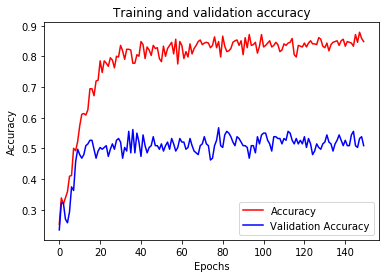

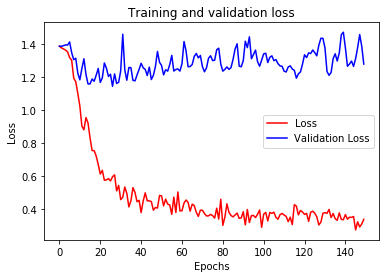

<Figure size 432x288 with 0 Axes>

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

## Evaluating the Model
Evaluating the trained model using the test set and displaying the output score and accuracy.

In [52]:
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=64)
print('Test score:', score)
print('Test accuracy:', acc*100)

143/143 [==============================] - 0s 205us/sample - loss: 1.1061 - accuracy: 0.5944
Test score: 1.106061034686082
Test accuracy: 59.44055914878845


## Testing the Model
Testing for each emotion with arbitrary examples.

### Angry Sentence Testing

In [0]:
#Angry Test Sentence
tot = []
sen = "मेरा दिमाग ख़राब मत कर और तुरंत रिचार्ज कर"
word_list=sen.split(' ')
tplist = []
cnt = 0
for to in range(len(newtokens)):
    if newtokens[to] in word_list:
      onehot = [0]*(len(newtokens))
      onehot[to] = 1
      tplist.append(onehot)
      cnt+=1
while cnt<20:
  onehot = [0]*(len(newtokens))
  tplist.append(onehot)
  cnt+=1
#temp = np.array(tplist)
#print(temp.shape)
tot.append(tplist)

In [33]:
test= tf.convert_to_tensor(tot)
print(test.shape)

(1, 20, 1464)


In [0]:
pred = model.predict(test)

In [35]:
print(pred)

[[9.9959368e-01 2.6466357e-04 4.8579177e-06 1.3685488e-04]]


In [36]:
if np.argmax(pred, axis=1)==[0] :
  print(sen, "angry sentence")
elif np.argmax(pred, axis=1)==[1] :
  print(sen, "sad sentence")
elif np.argmax(pred, axis=1)==[2] :
  print(sen, "happy sentence")
else:
  print(sen, "neutral sentence")

मेरा दिमाग ख़राब मत कर और तुरंत रिचार्ज कर angry sentence


### Sad Sentence Testing

In [0]:
#Sad Test Sentence
tot = []
sen = "मेरे मार्क्स बहुत खराब हैं इसलिए मैं दुखी हूं"
word_list=sen.split(' ')
tplist = []
cnt = 0
for to in range(len(newtokens)):
    if newtokens[to] in word_list:
      onehot = [0]*(len(newtokens))
      onehot[to] = 1
      tplist.append(onehot)
      cnt+=1
while cnt<20:
  onehot = [0]*(len(newtokens))
  tplist.append(onehot)
  cnt+=1
#temp = np.array(tplist)
#print(temp.shape)
tot.append(tplist)

In [38]:
test= tf.convert_to_tensor(tot)
print(test.shape)

(1, 20, 1464)


In [0]:
pred = model.predict(test)

In [40]:
print(pred)

[[6.9385744e-04 9.9905711e-01 2.2910335e-04 1.9920291e-05]]


In [41]:
if np.argmax(pred, axis=1)==[0] :
  print(sen, "angry sentence")
elif np.argmax(pred, axis=1)==[1] :
  print(sen, "sad sentence")
elif np.argmax(pred, axis=1)==[2] :
  print(sen, "happy sentence")
else:
  print(sen, "neutral sentence")

मेरे मार्क्स बहुत खराब हैं इसलिए मैं दुखी हूं sad sentence


### Happy Sentence Testing

In [0]:
#Happy Test Sentence
tot = []
sen = "धन के लिए धन्यवाद भाई"
word_list=sen.split(' ')
tplist = []
cnt = 0
for to in range(len(newtokens)):
    if newtokens[to] in word_list:
      onehot = [0]*(len(newtokens))
      onehot[to] = 1
      tplist.append(onehot)
      cnt+=1
while cnt<20:
  onehot = [0]*(len(newtokens))
  tplist.append(onehot)
  cnt+=1
#temp = np.array(tplist)
#print(temp.shape)
tot.append(tplist)

In [43]:
test= tf.convert_to_tensor(tot)
print(test.shape)

(1, 20, 1464)


In [0]:
pred = model.predict(test)

In [45]:
print(pred)

[[0.02085463 0.02558292 0.93076223 0.02280023]]


In [46]:
if np.argmax(pred, axis=1)==[0] :
  print(sen, "angry sentence")
elif np.argmax(pred, axis=1)==[1] :
  print(sen, "sad sentence")
elif np.argmax(pred, axis=1)==[2] :
  print(sen, "happy sentence")
else:
  print(sen, "neutral sentence")

धन के लिए धन्यवाद भाई happy sentence


### Neutral Sentence Testing

In [0]:
#Neutral Test Sentence
tot = []
sen = "आज का समय क्या है "
word_list=sen.split(' ')
tplist = []
cnt = 0
for to in range(len(newtokens)):
    if newtokens[to] in word_list:
      onehot = [0]*(len(newtokens))
      onehot[to] = 1
      tplist.append(onehot)
      cnt+=1
while cnt<20:
  onehot = [0]*(len(newtokens))
  tplist.append(onehot)
  cnt+=1
#temp = np.array(tplist)
#print(temp.shape)
tot.append(tplist)

In [48]:
test= tf.convert_to_tensor(tot)
print(test.shape)

(1, 20, 1464)


In [0]:
pred = model.predict(test)

In [50]:
print(pred)

[[0.05523797 0.08085631 0.07767874 0.786227  ]]


In [51]:
if np.argmax(pred, axis=1)==[0] :
  print(sen, "angry sentence")
elif np.argmax(pred, axis=1)==[1] :
  print(sen, "sad sentence")
elif np.argmax(pred, axis=1)==[2] :
  print(sen, "happy sentence")
else:
  print(sen, "neutral sentence")

आज का समय क्या है  neutral sentence
